### 讀取封包

In [144]:
get_ipython().magic('matplotlib inline')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns



np.random.seed(25)

### 讀資料

In [148]:
x_train = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/x_train.csv")
x_train.head(10)
x_test = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/x_test.csv")
# x_train

In [149]:
y_train = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/y_train.csv")
y_test = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/y_test.csv")

### 資料做標準化

In [150]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [151]:
x_train['x1'] = feature_normalize(x_train['x1'])
x_train['x2'] = feature_normalize(x_train['x2'])
x_test['x1'] = feature_normalize(x_test['x1'])
x_test['x2'] = feature_normalize(x_test['x2'])

### 開始維度的調整

In [152]:
XT = np.array(x_train)
XT
X_train = XT.reshape([3500, 10, 2])
XTE = np.array(x_test)
XTE
X_test = XTE.reshape([1500, 10, 2])
X_train

array([[[-0.93694717, -0.34497048],
        [ 1.04341265, -0.419277  ],
        [ 0.23346774, -0.37714586],
        ...,
        [ 0.32840634, -0.37302807],
        [ 0.33211487, -0.34509913],
        [-1.21953785, -0.09413487]],

       [[ 1.67831453,  0.53161283],
        [ 1.22661448,  0.43095604],
        [ 0.87949523,  0.38020684],
        ...,
        [ 0.84982692,  0.43689354],
        [-0.66177358,  0.60765535],
        [-1.0823219 ,  0.83886055]],

       [[ 0.32098925,  0.63154193],
        [ 1.35715505,  0.51218759],
        [ 0.30689681,  0.54371941],
        ...,
        [ 0.09773521,  0.69830074],
        [ 1.80440486,  0.51461193],
        [-0.11810176,  0.60722689]],

       ...,

       [[-1.19919804,  2.91948352],
        [-1.09037651,  2.89785874],
        [-1.61141247,  3.00777254],
        ...,
        [-0.96809648,  3.05331444],
        [-0.79198249,  2.95632655],
        [ 2.52726651,  2.02095532]],

       [[-0.5943349 , -1.59725152],
        [-1.88096687, -1.41

In [153]:
y_train.shape

(3500, 1)

In [154]:
input_shape = (10*2)   ## 20*1 每一筆資料 10(時間) 2個變數(x1 x2) 
X_train = X_train.reshape(X_train.shape[0], input_shape)  ## 把10*2 矩陣  變成 20 array了!!  很重要!! 如何擺法!

In [155]:
input_shape = (10*2)   ## 20*1 每一筆資料 10(時間) 2個變數(x1 x2) 
X_test = X_test.reshape(X_test.shape[0], input_shape)  ## 把10*2 矩陣  變成 20 array了!!  很重要!! 如何擺法!

### 對y做onehot，總共有(0,1,2,3,4)五個字

In [11]:
y_train_onehot = np_utils.to_categorical(y_train, num_classes = 5)
y_train_onehot
y_test_onehot = np_utils.to_categorical(y_test, num_classes = 5)
y_train_onehot.shape

(3500, 5)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(input_shape)

(3500, 20)
(1500, 20)
20


### 開始準備CNN

In [156]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import keras

In [157]:
model_m = Sequential()
model_m.add(Reshape((10, 2), input_shape=(input_shape,)))  ##將一個樣本的20個數值轉為 10x2 矩陣
model_m.add(Conv1D(100, 2, activation='relu', input_shape=(10, 2)))
model_m.add(Conv1D(100, 2, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Conv1D(160, 2, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(5, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 10, 2)             0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 9, 100)            500       
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 8, 100)            20100     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 4, 100)            0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 3, 160)            32160     
_________________________________________________________________
global_average_pooling1d_13  (None, 160)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 160)               0         
__________

In [158]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

In [159]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 200
EPOCHS = 30

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(X_train, y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.18, verbose=1)


Train on 2870 samples, validate on 630 samples
Epoch 1/30
2870/2870 [==============================] - 3s 873us/step - loss: 1.3448 - acc: 0.4878 - val_loss: 3.3268 - val_acc: 0.0000e+00
Epoch 2/30
2870/2870 [==============================] - 0s 121us/step - loss: 0.8898 - acc: 0.6456 - val_loss: 3.9822 - val_acc: 0.0000e+00
Epoch 3/30
2870/2870 [==============================] - 0s 121us/step - loss: 0.7393 - acc: 0.6899 - val_loss: 2.2586 - val_acc: 0.0000e+00
Epoch 4/30
2870/2870 [==============================] - 0s 125us/step - loss: 0.6529 - acc: 0.7321 - val_loss: 2.0968 - val_acc: 0.0000e+00
Epoch 5/30
2870/2870 [==============================] - 0s 127us/step - loss: 0.6038 - acc: 0.7509 - val_loss: 2.3848 - val_acc: 0.0000e+00
Epoch 6/30
2870/2870 [==============================] - 0s 127us/step - loss: 0.5629 - acc: 0.7676 - val_loss: 1.3938 - val_acc: 0.0016
Epoch 7/30
2870/2870 [==============================] - 0s 121us/step - loss: 0.5389 - acc: 0.7669 - val_loss: 1.7634

(BATCH_SIZE = 200),(EPOCHS = 30),(validation_split=0.18)

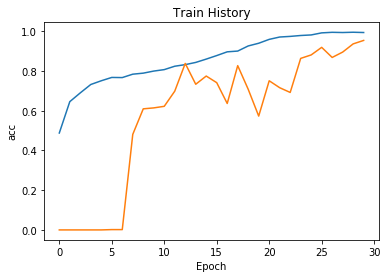

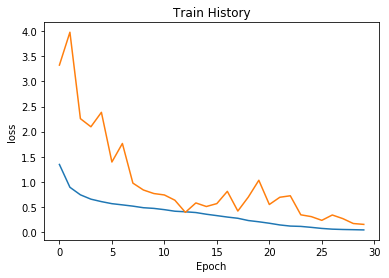

In [160]:
show_train_history(history, 'acc', 'val_acc')

show_train_history(history, 'loss', 'val_loss')



--- Learning curve of model training ---



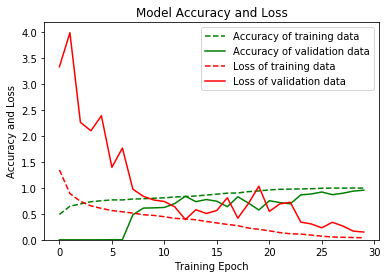

In [161]:
print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


### 把test資料丟進來看準確度

In [162]:
score = model_m.evaluate(X_test, y_test_onehot, verbose=1)
print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

1500/1500 [==============================] - 0s 115us/step

Accuracy on test data: 0.99

Loss on test data: 0.05


### 從混沌矩陣來看結果

In [165]:
def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()



--- Confusion matrix for test data ---



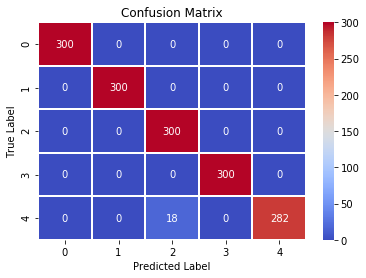


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.94      1.00      0.97       300
           3       1.00      1.00      1.00       300
           4       1.00      0.94      0.97       300

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [166]:
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_m.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_onehot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))
